### Steps
#### 1- Import necessary libraries
#### 2- Read the dataset using Pandas
#### 3- Explore the dataset properties
#### 4- Visualize the relationship between different variables and draw insights

In [39]:
#To read the dataset
import pandas as pd 

#For visualization
import matplotlib.pyplot as plt

In [40]:
#Read the dataset
uber_df= pd.read_csv("Data/uber-raw-data-sep14.csv")

#Display the first 5 records
uber_df.head(5)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [41]:
#Display the last 5 records
uber_df.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [42]:
#Find the shape of the dataset (check the number of rows and columns )
uber_df.shape

(1028136, 4)

In [43]:
#Understand the dataset properties , like detail about each column ex : 
# Column 1 (Lat) has 1028136 non-null entries of type float64.
# Column 2 (Lon) has 1028136 non-null entries of type float64
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


#### Let's break the Date/Time column to "Day", "Hour", & "Weekday".

In [44]:
#Change the "Date/Time" column's data type from string to datetime, so that we get realistic info
uber_df['Date/Time']= pd.to_datetime(uber_df['Date/Time'])

#Convert "Date/Time" column from string data type into DateTime, use 
# The apply method calls lambda function, and applies the computation to each row of the data frame. Besides, apply 
# can also do the modification for every column in the data frame., 
# extract day , month , weekday using Date/Time column 

uber_df["Day"] = uber_df["Date/Time"].apply(lambda x: x.day)
uber_df["Hour"] = uber_df["Date/Time"].apply(lambda x: x.hour)
uber_df["Weekday"] = uber_df["Date/Time"].apply(lambda x: x.weekday())
uber_df.head(5)

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


#### Now we can check the density of rides according to days, hours, and weekdays

Text(0, 0.5, 'Density of rides')

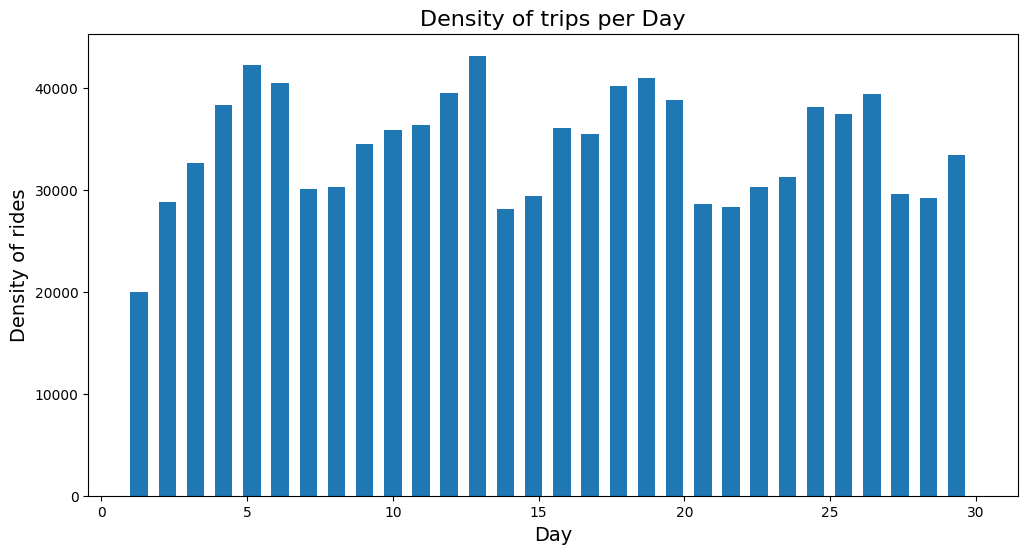

In [45]:
#Visualize the Density of rides per Day of month, creates a new figure and axes for the upcoming histogram plot. The figsize , fig=> return object , ax => array of x-y-axis to interact in future with histogram to get figure 
fig,ax = plt.subplots(figsize = (12,6))
# plot the histogram 
plt.hist(uber_df.Day, width= 0.6, bins= 30)
# Adding Title and Labels to histogram 
plt.title("Density of trips per Day", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### From the above plot we can notice that the highest number of rides are during working days (Monday to Friday), while the least number of rides are in weekends.

Text(0, 0.5, 'Density of rides')

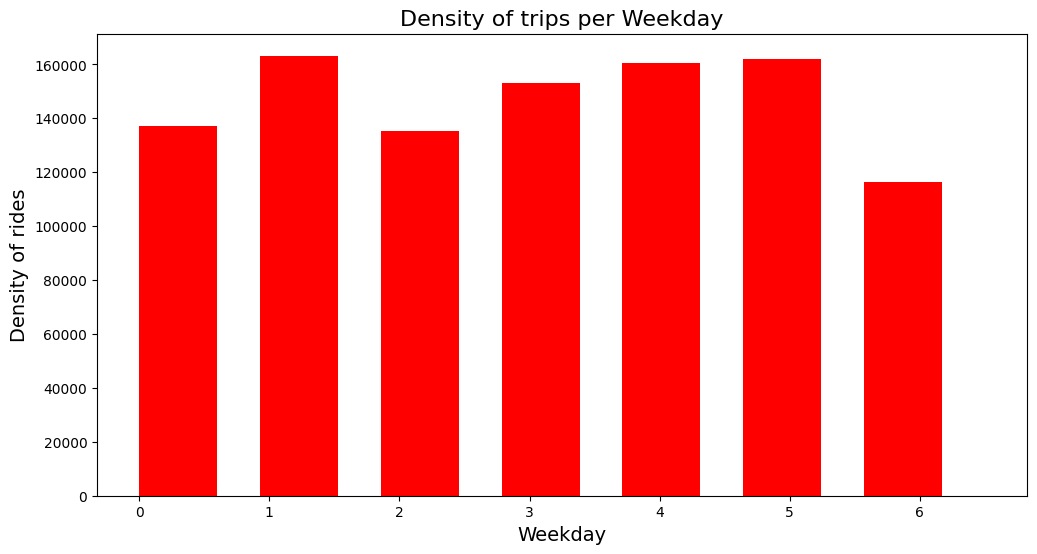

In [46]:
#Visualize the Density of rides per Weekday
fig,ax = plt.subplots(figsize = (12,6)) # 12 inches width and 6 inches height 
plt.hist(uber_df.Weekday, width= 0.6, range= (0, 6.5), bins=7, color= "red") #0.6->width of each bar in histo , 6.5 => include 6 
# also , 7=> intervals on x axis (mon-sun)
plt.title("Density of trips per Weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=14) # 14 => 14/72 inches for text-size of x-axis 
plt.ylabel("Density of rides", fontsize=14) # 14 => 14/72 inches for text-size of y-axis

#### The busiest day in the week for Uber is Monday. On the other hand, Saturday is the day with the least number of rides.

Text(0, 0.5, 'Density of rides')

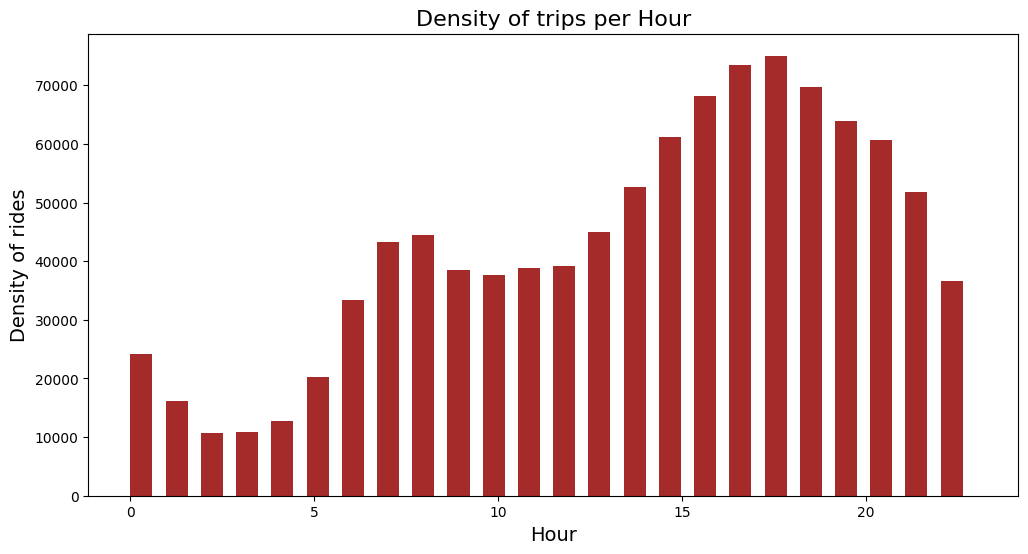

In [47]:
#Visualize the Density of rides per hour , cuz we see Saturday(x-axes = 6) is lazy , but Moday(x-axes=1) is Busy
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Hour, width= 0.6, bins=24, color= "brown") # 24 => 24 hours in each day 
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### It seems like the number of rides decrease gradually from 1 AM to 4 PM and then increases starting from 5 AM onward till it reaches 6 PM which is the hour with the highest number of rides.

Text(0, 0.5, 'Density of rides')

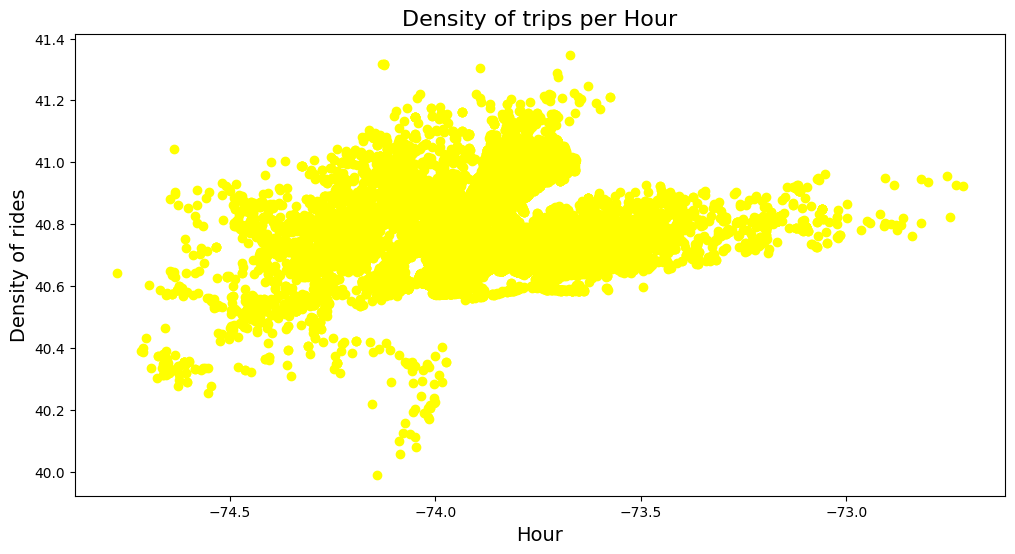

In [48]:
# from the above diagram after 0,  1am-4am decreasing graph , then 5am-6pm (max-value) increasing (not strictly , but 
# profit for business ) 

#Visualize the Density of rides per location
fig,ax = plt.subplots(figsize = (12,6))
# fetch the latitiude and longitude 
x= uber_df.Lon 
y= uber_df.Lat
plt.scatter(x, y, color= "yellow") # scatter based on latitude and longitude for each uber-rider 
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### The region with the highest density of rides is near Manhattan and Newburgh. While the region with the lowest density is near New Jersey.


In [49]:
import folium
from folium.plugins import HeatMap

In [50]:
# Create a base map centered at the average latitude and longitude (so that we can get the over-all view of dataset)
average_lat = uber_df['Lat'].mean()
average_lon = uber_df['Lon'].mean()

# find the location using latitude and longitude 
# we want to see distance in km => control_scale=True , zoom_start=11 => startingly display of map 
base_map = folium.Map(location=[average_lat, average_lon], control_scale=True, zoom_start=11)

In [51]:
# Plot pickup locations as HeatMap
# convert the numpy-array to standard list , 

# radius = 10 ? ->  sets the radius of influence of each data point on the heatmap. A larger radius means the 
# influence of each point will be spread over a larger area, resulting in a smoother heatmap.

# max_zoom = 13 -> beyond which heatmap is not proper -> 13 is best detailed view of heatmap

# .add_to(base_map): This method is used to add the heatmap layer to the base_map created earlier. The HeatMap object 
# is created with the specified parameters (pickup_heatmap_data, radius, max_zoom), and then it's added as a layer to 
# the base_map using the add_to method

pickup_heatmap_data = uber_df[['Lat', 'Lon']].values.tolist()
HeatMap(pickup_heatmap_data, radius=10, max_zoom=13).add_to(base_map)

# Display the map
base_map.save('pickup_heatmap.html')

In [52]:
import folium
from folium.plugins import MarkerCluster

In [53]:
# Create a base map centered at the average latitude and longitude
average_lat = uber_df['Lat'].mean()
average_lon = uber_df['Lon'].mean()
base_map = folium.Map(location=[average_lat, average_lon], control_scale=True, zoom_start=11)

In [54]:
# Create a MarkerCluster and also faster so %time
%time
marker_cluster = MarkerCluster().add_to(base_map)

# Use a smaller subset of the data (e.g., first 100 rows) for testing
subset_df = uber_df.head(100)

# Iterate through the DataFrame and add markers to the cluster
%time
for index, row in subset_df.iterrows():
    
    folium.Marker(
        location=[row['Lat'], row['Lon']],
        tooltip=f"Pickup time: {row['Date/Time']}",
    ).add_to(marker_cluster)

# Save the map
base_map.save('clustered_map_with_tooltips.html')

CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 0 ns


In [55]:
# i want to combine both the datasets to future analyze wrt rainfall for each lat and lon columns 
# Load weather.csv
weather_df = pd.read_csv("Data/weather.csv")

# Load uber_data.csv
uber_df = pd.read_csv("Data/uber-raw-data-sep14.csv")

In [56]:
# Select the first 50 rows from each dataframe
weather_subset = weather_df.head(50)
uber_subset = uber_df.head(50)

In [57]:
# Merge the dataframes based on an appropriate column (e.g., Date/Time)
merged_df = pd.merge(weather_subset, uber_subset, left_index=True, right_index=True)

In [58]:
# Save the merged dataframe to a new CSV file
merged_df.to_csv("Data/merged_data.csv", index=False)
# Display the merged dataframe
print(merged_df)

    MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0       8.0     24.3       0.0          3.4       6.3          NW   
1      14.0     26.9       3.6          4.4       9.7         ENE   
2      13.7     23.4       3.6          5.8       3.3          NW   
3      13.3     15.5      39.8          7.2       9.1          NW   
4       7.6     16.1       2.8          5.6      10.6         SSE   
5       6.2     16.9       0.0          5.8       8.2          SE   
6       6.1     18.2       0.2          4.2       8.4          SE   
7       8.3     17.0       0.0          5.6       4.6           E   
8       8.8     19.5       0.0          4.0       4.1           S   
9       8.4     22.8      16.2          5.4       7.7           E   
10      9.1     25.2       0.0          4.2      11.9           N   
11      8.5     27.3       0.2          7.2      12.5           E   
12     10.1     27.9       0.0          7.2      13.0         WNW   
13     12.1     30.9       0.0    

In [59]:
# Perform additional analysis as needed
# For example, you can use describe() to get descriptive statistics
analysis_result = merged_df.describe()
print(analysis_result)

         MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  50.000000  50.000000  50.000000    50.000000  50.00000      50.000000   
mean   12.298000  24.618000   2.876000     5.604000   7.55800      40.420000   
std     2.981336   4.779749   7.512916     2.110224   4.09086      10.214216   
min     6.100000  15.500000   0.000000     1.200000   0.00000      22.000000   
25%    10.100000  21.025000   0.000000     4.200000   4.22500      33.500000   
50%    12.700000  24.300000   0.000000     5.800000   8.75000      41.000000   
75%    14.975000  27.975000   1.350000     7.150000  10.60000      44.000000   
max    17.200000  33.400000  39.800000    10.400000  13.10000      85.000000   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count     50.000000     50.000000    50.000000    50.000000    50.000000   
mean       9.480000     16.220000    70.140000    46.560000  1017.200000   
std        6.158585      7.505889    10.456928    1

In [ ]:
# now from this merged-file we will extract day month year 

In [60]:
# Load the merged CSV file into a DataFrame
file_path = 'Data/merged_data.csv'
df = pd.read_csv(file_path)

In [61]:
# Convert "Date/Time" column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [62]:
# Extract day, month, and year and create new columns
df['Day'] = df['Date/Time'].dt.day
df['Month'] = df['Date/Time'].dt.month
df['Year'] = df['Date/Time'].dt.year

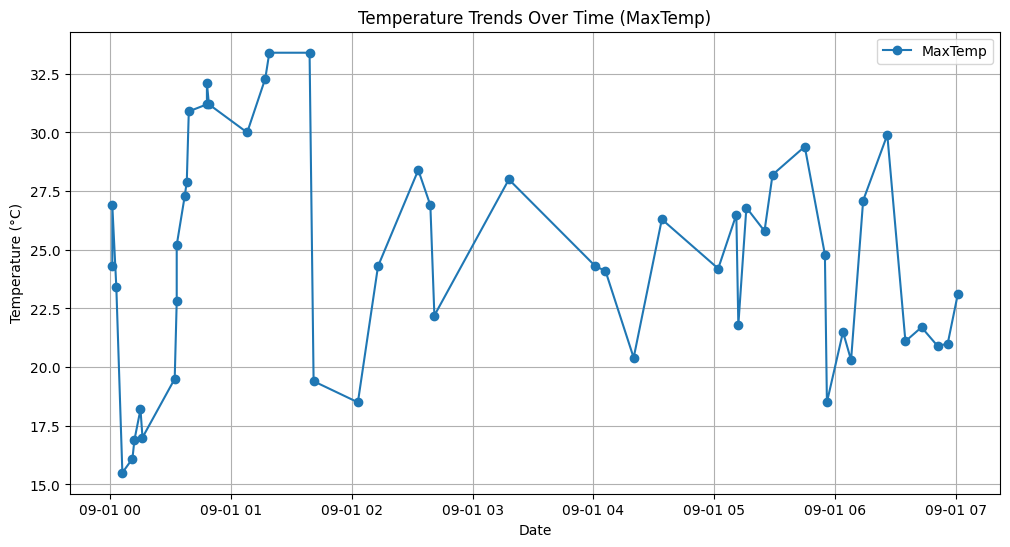

In [63]:
#  Plot the trends of temperature over time
plt.figure(figsize=(12, 6))

temperature_column = 'MaxTemp'

plt.plot(df['Date/Time'], df[temperature_column], marker='o', label=temperature_column)
plt.title(f'Temperature Trends Over Time ({temperature_column})')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
# Plot the trends of rainfall over time
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

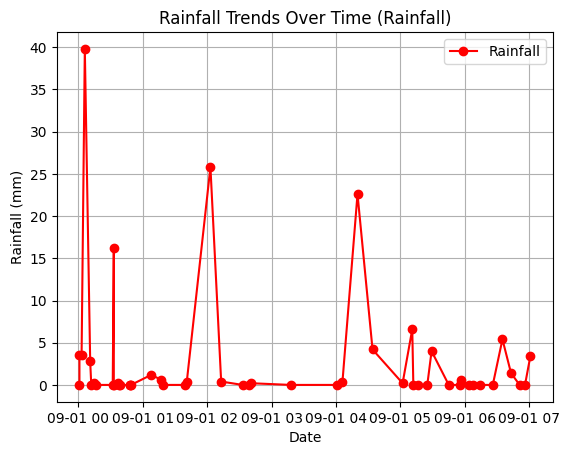

In [65]:
# Assuming you have a 'Rainfall' column
rainfall_column = 'Rainfall'

plt.plot(df['Date/Time'], df[rainfall_column], marker='o', color='r', label=rainfall_column)
plt.title(f'Rainfall Trends Over Time ({rainfall_column})')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
# todo rainfall and pricing analysis , and then plot the heatmap for both in one single map
data = pd.read_csv('Data/merged_data.csv')

In [67]:
# Create a heatmap based on MinTemp, MaxTemp, and Rainfall, but remove the rows that contain null values using dropna()
locations = data[['Lat', 'Lon', 'MinTemp', 'MaxTemp', 'Rainfall']].dropna()

In [68]:
# Normalize the data for better visualization
locations['MinTemp'] = (locations['MinTemp'] - locations['MinTemp'].min()) / (locations['MinTemp'].max() - locations['MinTemp'].min())
locations['MaxTemp'] = (locations['MaxTemp'] - locations['MaxTemp'].min()) / (locations['MaxTemp'].max() - locations['MaxTemp'].min())
locations['Rainfall'] = (locations['Rainfall'] - locations['Rainfall'].min()) / (locations['Rainfall'].max() - locations['Rainfall'].min())

In [69]:
# Create a map centered around the mean of latitude and longitude
m = folium.Map(location=[locations['Lat'].mean(), locations['Lon'].mean()], zoom_start=10)

In [70]:
# Add heatmap layer with custom colors for each attribute
gradient = {0.2: 'blue', 0.4: 'green', 0.6: 'yellow', 0.8: 'orange', 1: 'red'}

HeatMap(locations[['Lat', 'Lon', 'MinTemp']].values, radius=15, gradient=gradient, name='MinTemp').add_to(m)
HeatMap(locations[['Lat', 'Lon', 'MaxTemp']].values, radius=15, gradient=gradient, name='MaxTemp').add_to(m)
HeatMap(locations[['Lat', 'Lon', 'Rainfall']].values, radius=15, gradient=gradient, name='Rainfall').add_to(m)

In [71]:
# Add popups for exact latitude and longitude in heatmap - to get precised location 
for _, row in locations.iterrows():
    folium.Marker([row['Lat'], row['Lon']],
                  popup=f"Lat: {row['Lat']}, Lon: {row['Lon']}").add_to(m)
    
# Add layer control to toggle between different attributes
folium.LayerControl(collapsed=False).add_to(m)

# Save the map as an HTML file
m.save('heatmap_with_detailed_analysis.html')

In [72]:
# now add the random columnn DefaultPrice 
import numpy as np

In [73]:
# Load your existing merged_data.csv file
data = pd.read_csv('Data/exp_merged_data.csv')

In [74]:
# Add a new column 'DefaultPrice' with random values between $10 and $15
data['DefaultPrice'] = np.random.uniform(10, 15, len(data))
# Save the modified DataFrame back to the CSV file , dont-add the index-value  , so index=false
data.to_csv('Data/exp_merged_data.csv', index=False)

In [75]:
# now perform the price analysis for each area 
# Create a heatmap based on MinTemp, MaxTemp, Rainfall, and DefaultPrice
heatmap_data = data[['Lat', 'Lon', 'MinTemp', 'MaxTemp', 'Rainfall', 'DefaultPrice']].dropna()

In [81]:
# Normalize the data for better visualization
for column in ['MinTemp', 'MaxTemp', 'Rainfall', 'DefaultPrice']:
    heatmap_data[column] = (heatmap_data[column] - heatmap_data[column].min()) / (heatmap_data[column].max() - heatmap_data[column].min())
    
# Normalize the DefaultPrice column to fall between $10 and $15
heatmap_data['DefaultPrice'] = 10 + heatmap_data['DefaultPrice'] * 5    

In [82]:
# Create a map centered around the mean of latitude and longitude
m = folium.Map(location=[heatmap_data['Lat'].mean(), heatmap_data['Lon'].mean()], zoom_start=10)

In [83]:
# Add heatmap layer with custom colors for each attribute
gradient = {0.2: 'blue', 0.4: 'green', 0.6: 'yellow', 0.8: 'orange', 1: 'red'}

HeatMap(heatmap_data[['Lat', 'Lon', 'MinTemp']].values, radius=15, gradient=gradient, name='MinTemp').add_to(m)
HeatMap(heatmap_data[['Lat', 'Lon', 'MaxTemp']].values, radius=15, gradient=gradient, name='MaxTemp').add_to(m)
HeatMap(heatmap_data[['Lat', 'Lon', 'Rainfall']].values, radius=15, gradient=gradient, name='Rainfall').add_to(m)
HeatMap(heatmap_data[['Lat', 'Lon', 'DefaultPrice']].values, radius=15, gradient=gradient, name='DefaultPrice').add_to(m)

In [84]:
# Add popups for exact latitude, longitude, and price in heatmap - to get precise location and price
for _, row in heatmap_data.iterrows():
    folium.Marker([row['Lat'], row['Lon']],
                  popup=f"Lat: {row['Lat']}, Lon: {row['Lon']}, Price: ${row['DefaultPrice']:.2f}").add_to(m)

In [85]:
# Add layer control to toggle between different attributes
folium.LayerControl(collapsed=False).add_to(m)

# Save the map as an HTML file
m.save('heatmap_with_priced_analysis.html')

In [86]:
# it will imagine - not actually go and change the exp_merged_data.csv and insert the columns Revenue , Expense ,Profit
# Calculate revenue based on DefaultPrice
heatmap_data['Revenue'] = heatmap_data['DefaultPrice']

# Estimate expenses 
heatmap_data['Expenses'] = 0.2 * heatmap_data['Revenue']

# Calculate profit
heatmap_data['Profit'] = heatmap_data['Revenue'] - heatmap_data['Expenses']

In [88]:
# Sum up the total revenue, expenses, and profit
total_revenue = heatmap_data['Revenue'].sum()
total_expenses = heatmap_data['Expenses'].sum()
total_profit = heatmap_data['Profit'].sum()

# Print the results, 
# The \033[1m is an ANSI escape code that represents the beginning of a control sequence to change the text style. Specifically, \033[1m is used to set the text to bold, [0m => END 
print("\033[1mUBER ANALYSIS FOR PROFIT\033[0m")
print(f'Total Revenue: ${total_revenue:.2f}')
print(f'Total Expenses: ${total_expenses:.2f}')
print(f'Total Profit: ${total_profit:.2f}')

UBER ANALYSIS FOR PROFIT
Total Revenue: $620.28
Total Expenses: $124.06
Total Profit: $496.22
